<a href="https://colab.research.google.com/github/LoloziAnas/deeplearning/blob/master/PredictingThePriceOfUsedCars_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

['Manual' 'Automatic' 'Semi-Auto' 'Other']
['Petrol' 'Other' 'Hybrid' 'Diesel']
0.644531
0.77579
0.834321
0.895538
0.915575
0.927473
0.940534
0.945443
0.94484
0.947654
0.944589
0.942217
0.940696
0.940387
0.938142
0.935619
0.937417
0.936403
Maximum score is 0.947654 


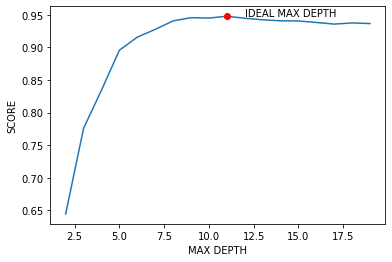

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Wed Sep 30 17:33:49 2020

@author: achra
"""
# Neccessary modules.

import pandas as pd
#from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt 

# Import the dataset.

dataset = pd.read_csv('toyota.csv')

# Cleaning the data.

print(dataset['transmission'].unique())
#['Manual' 'Automatic' 'Semi-Auto' 'Other']

#Exclude the case that contains Other.
dataset = dataset[dataset.transmission != 'Other']

print(dataset['fuelType'].unique())
#['Petrol' 'Other' 'Hybrid' 'Diesel']

#Exclude the case that contains Other.
dataset = dataset[dataset.fuelType != 'Other']

# Replace the qualitative with quantitative variables.

#====================Transmission========================
dataset['transmission'].replace('Manual',0,inplace=True)
dataset['transmission'].replace('Automatic',1,inplace=True)
dataset['transmission'].replace('Semi-Auto',2,inplace=True)

#====================Fuel type============================
dataset['fuelType'].replace('Petrol',0,inplace=True)
dataset['fuelType'].replace('Diesel',1,inplace=True)
dataset['fuelType'].replace('Hybrid',2,inplace=True)

# Changing the type of the features fuelType and transmission from Series to integer.
dataset['fuelType']=dataset['fuelType'].astype(int)
dataset['transmission']=dataset['transmission'].astype(int)

# Splitting data to features and target.
feature_cols=['year','transmission','mileage','tax','mpg','engineSize']
x = dataset[feature_cols]
y = dataset.price

# Splitting data into training and test data.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

# Decision Tree
Scores = []
from sklearn.tree import DecisionTreeRegressor
for i in range(2,20):
    tree = DecisionTreeRegressor(max_depth=i)
    tree.fit(x_train,y_train)

    # Predict the test output 
    y_pred = tree.predict(x_test)
    score = tree.score(x_test,y_test)
    Scores.append(score)

Scores = [round(X,6) for X in Scores]
for i in range(0,18):
    print(Scores[i])
    
print('Maximum score is {} '.format(max(Scores)))


plt.plot([x for x in range(2,20)],Scores)
plt.plot(Scores.index(max(Scores))+2,max(Scores),'ro')
plt.annotate("IDEAL MAX DEPTH", (Scores.index(max(Scores))+3,max(Scores)))
plt.xlabel("MAX DEPTH")
plt.ylabel("SCORE")
plt.savefig('max depth.png')


    

#        # Calculate the accuracy of the model
#        score = tree.score(x_test,y_test)
#print('DECISION TREE SCORE  : {}'.format(score))
#
## Predict a new input
#df = pd.DataFrame({'year':[2013],'transmission':[0],'mileage':[10000],'tax':[265],'mpg':[36.2],'engineSize':[2.0]})
#prediction = tree.predict(df)
#
#print('The estimated price for a car with those specification is : {}'.format(prediction))






